# ALL RESULTS OF CLASSIFICATION

In [92]:
import torch
from celeb_classifier import MLPClassifierWrapper
from facenet_pytorch import InceptionResnetV1
from src.data_loader import FairFaceData, CelebData
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

In [119]:
def get_metrics(path):
    metrics = pd.read_csv(path)
    print(f"Untrained Test Accuracy:\t{metrics['test_acc'][0] * 100:.4f}%")
    print(f"Final Test Accuracy:\t\t{metrics['test_acc'].to_numpy()[-1] * 100:.4f}%")

def plot_sample(model, sample, device):
    fig, axes = plt.subplots(2, 5, figsize = (30, 15))
    axes = axes.flatten()
    with torch.no_grad():
        for idx, ax in enumerate(axes):
            x, y = sample[idx]
            if y.item() == -1 or y.item() == 0:
                y = 0
            else:
                y = 1
            img = to_pil_image(x)
            x = x.float().to(device)
            yhat = model(x.unsqueeze(0))
            ax.set_title(f'Predicted: {round(yhat.item())}, Truth: {y}')
            ax.imshow(img)
    fig.show()

In [52]:
root = Path('..')
result_root = root / 'results'

In [83]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cuda for inference


In [ ]:
# load sample dataset
celeb_sample = CelebData(root = str(root), sample = True)

VGGFACE2

In [61]:
vgg_result_path = result_root / 'celeb_results_vggface2' / 'lightning_logs' / 'version_0'

In [62]:
get_metrics(str(vgg_result_path / 'metrics.csv'))

Untrained Test Accuracy:	60.6008%
Final Test Accuracy:		75.5464%


In [84]:
trained_model = InceptionResnetV1(pretrained = 'vggface2', device = device, classify=False)
trained_model = trained_model.eval()

In [101]:
# run model
vggface_model = MLPClassifierWrapper.load_from_checkpoint(str(vgg_result_path / 'checkpoints' / 'epoch=41-val_loss=0.50.ckpt'))
# set trained model
vggface_model.trained_model = trained_model
vggface_model = vggface_model.to(device)

C:\Users\johnd\AppData\Local\Temp\ipykernel_15084\3648908260.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


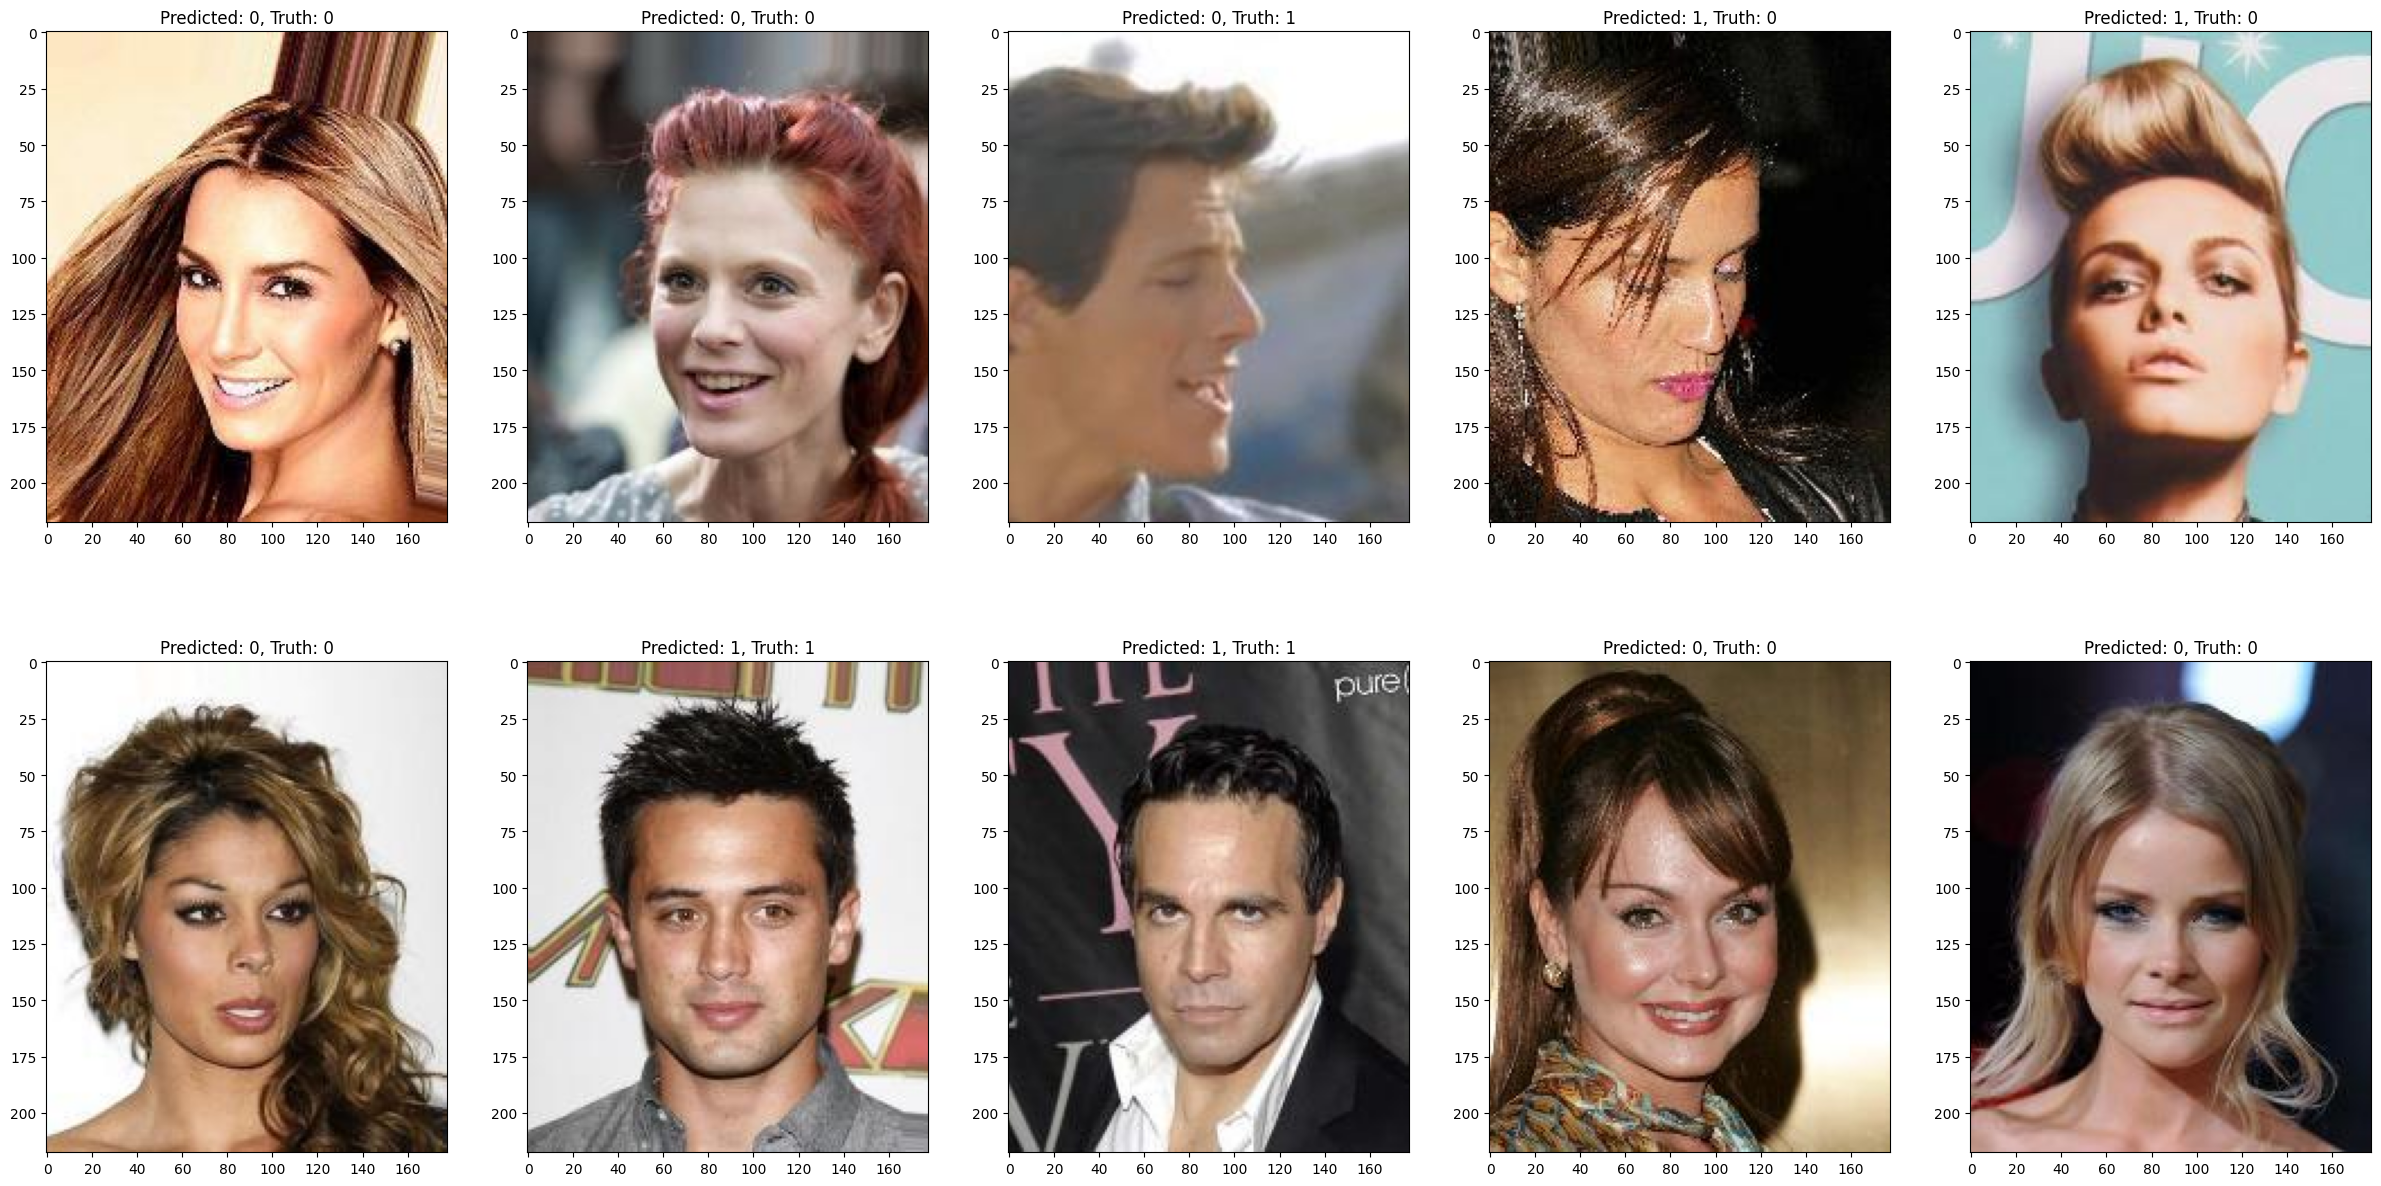

In [106]:
plot_sample(vggface_model, celeb_sample, device)

CASIA-WEBPAGE

In [47]:
casia_result_path = result_root / 'celeb_results_casia' / 'lightning_logs' / 'version_0'

In [48]:
get_metrics(str(casia_result_path / 'metrics.csv'))

Untrained Test Accuracy:	38.3856%
Final Test Accuracy:		78.9727%


In [116]:
trained_model2 = InceptionResnetV1(pretrained = 'casia-webface', device = device, classify=False)
trained_model2 = trained_model2.eval()

In [117]:
# run model
casia_model = MLPClassifierWrapper.load_from_checkpoint(str(casia_result_path / 'checkpoints' / 'epoch=57-val_loss=0.44.ckpt'))
# set trained model
casia_model.trained_model = trained_model2
casia_model = casia_model.to(device)

C:\Users\johnd\AppData\Local\Temp\ipykernel_15084\3648908260.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


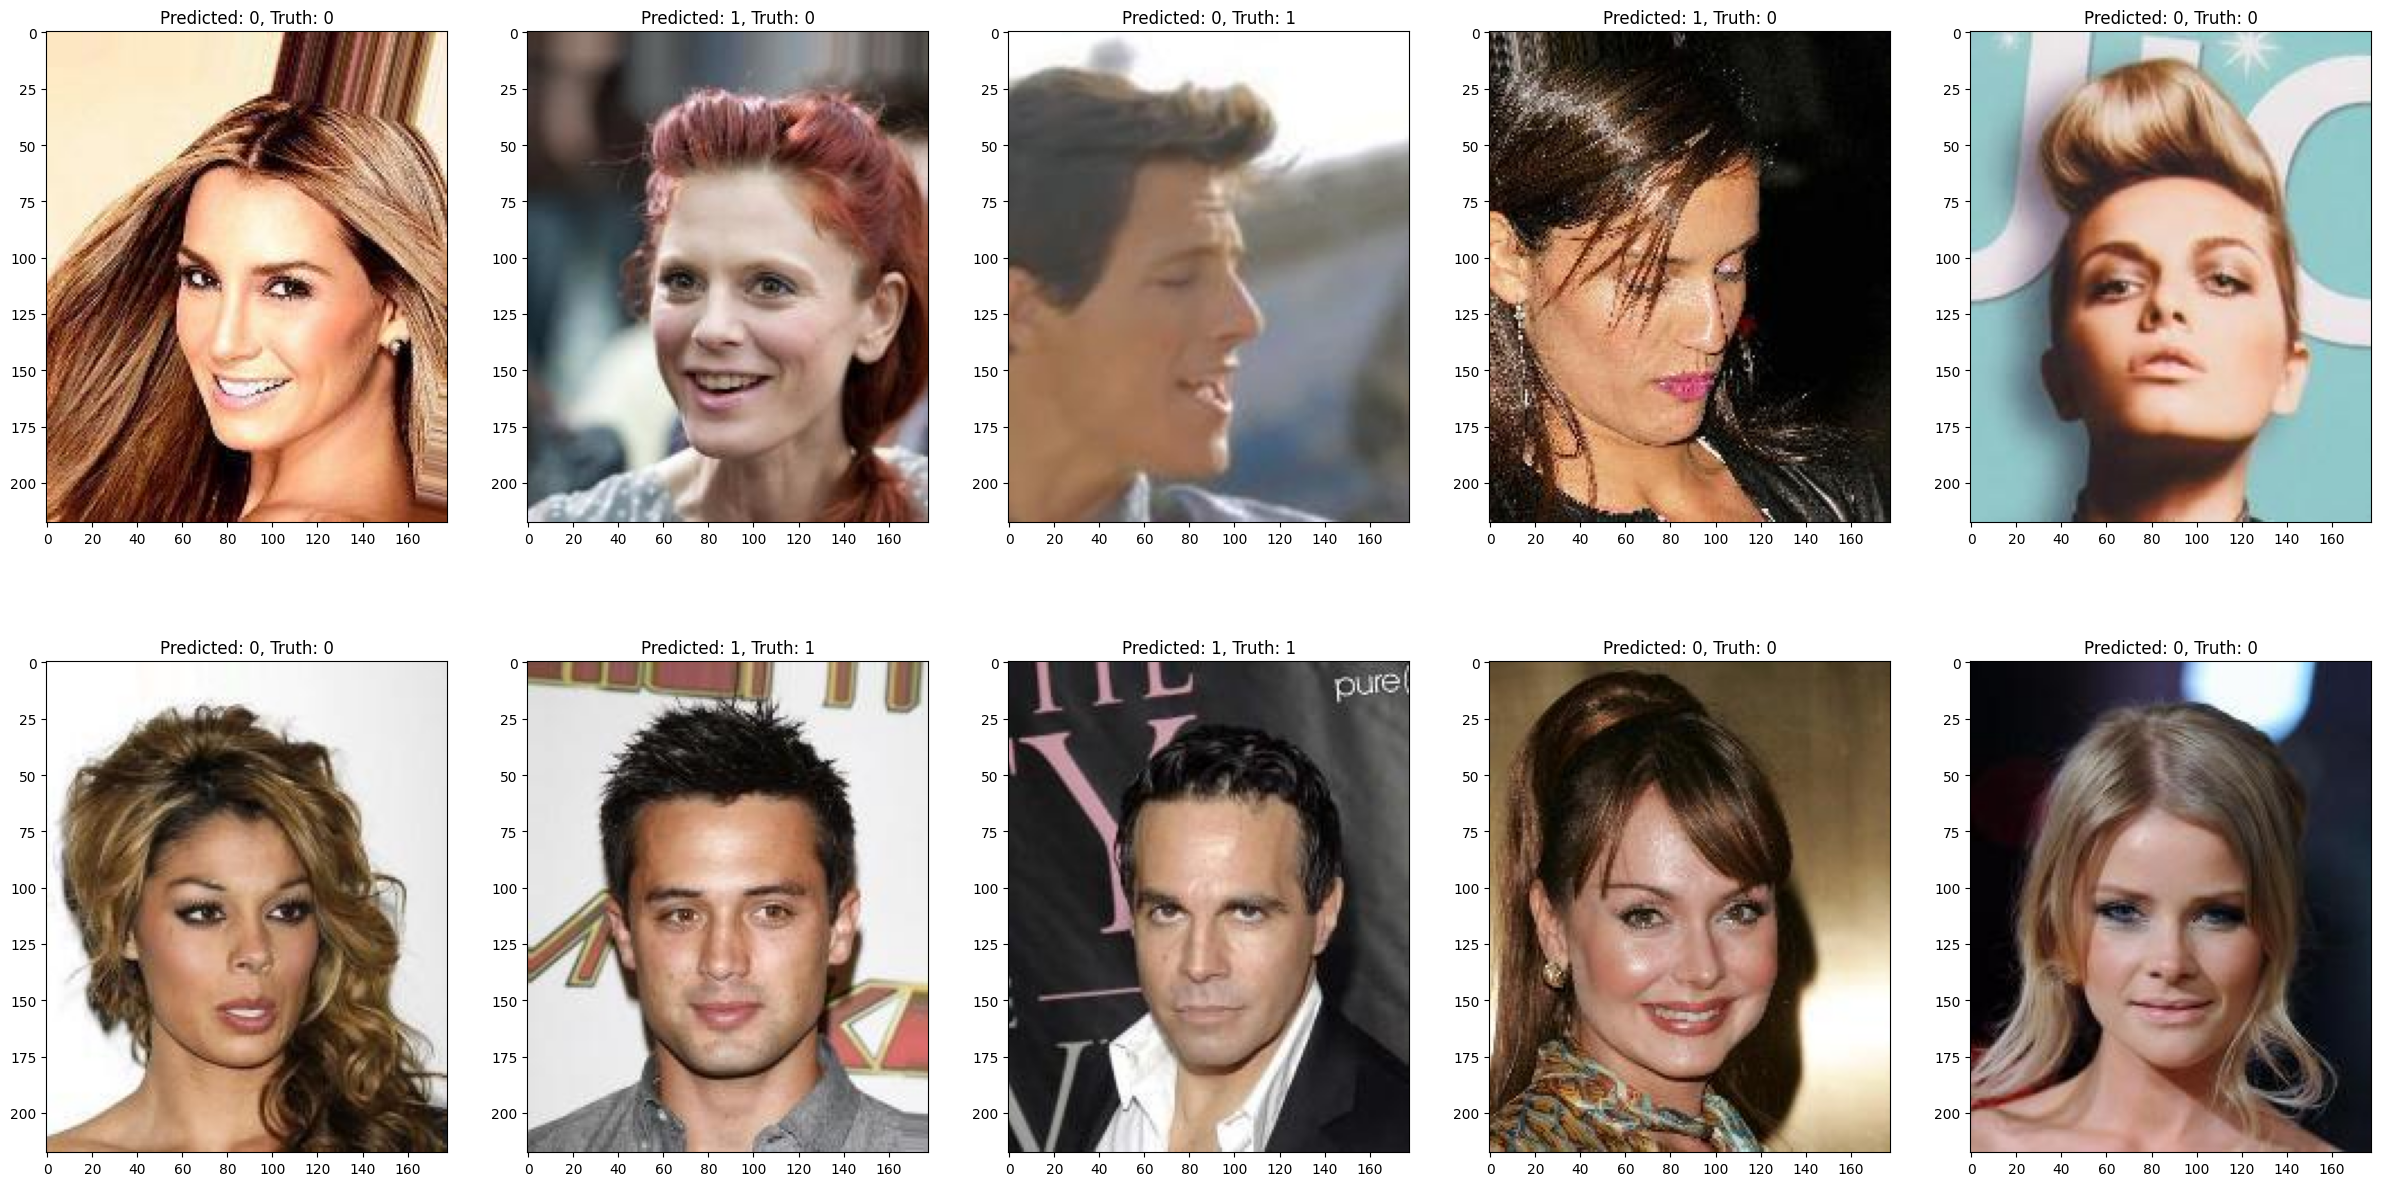

In [120]:
plot_sample(casia_model, celeb_sample, device)